# SALES FORECAST PROJECT

Our goal is to create a forecasting model
from the sales history and
investment in marketing.

In [1]:
import pandas as pd
df = pd.read_csv('C:/Users/Admin/Downloads/advertising.csv')

In [2]:
df.head()

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

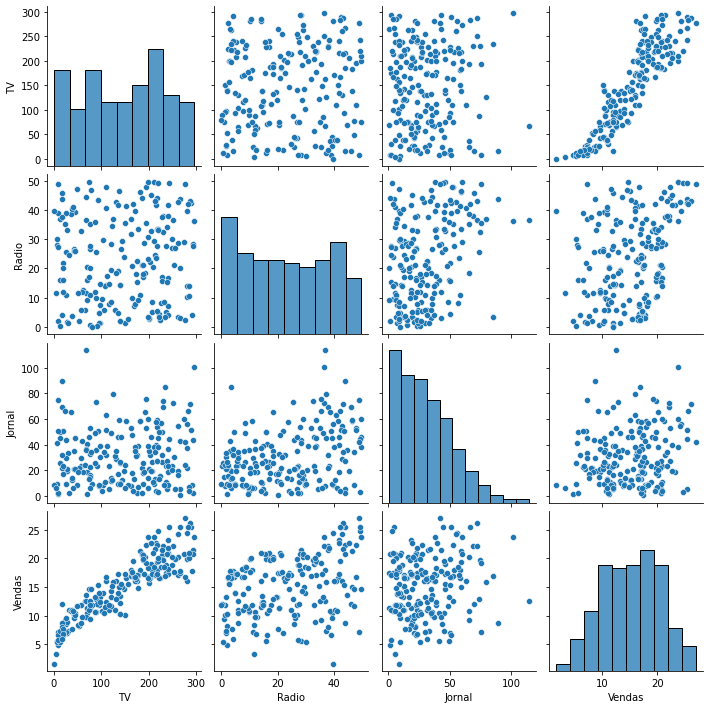

In [5]:
# visualização mais genérica
sns.pairplot(df)

<AxesSubplot:>

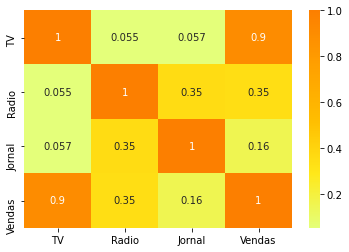

In [6]:
# calcular as correlações e plotar os valores em um heatmap
sns.heatmap(df.corr(), cmap = 'Wistia', annot=True )

Note que a maior correlação é entre vendas e TV

# Criação do modelo de previsão de vendas

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
# excluir a coluna venda do eixo dos inputs
x = df.drop('Vendas', axis=1)

#EIXO Y RECEBE OS VALORES DO CAMPO VENDAS
y = df['Vendas']

In [9]:
# variáveis de treino e de teste                          proporção de dados para teste e valor do seed aleatório
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import numpy as np

In [11]:
# realizar o treino
linreg = LinearRegression()
linreg.fit(x_train, y_train)



LinearRegression()

In [12]:
randomforest = RandomForestRegressor()
randomforest.fit(x_train, y_train)

RandomForestRegressor()

In [13]:
# iniciar os testes
test_pred_lin = linreg.predict(x_test)
test_pred_rf = randomforest.predict(x_test)

In [14]:
# R^2 da regressão linear
metrics.r2_score(y_test, test_pred_lin)

0.9071151423684273

In [15]:
# RSME da regressão linear
np.sqrt(metrics.mean_squared_error(y_test, test_pred_lin))

1.5396947656031235

In [16]:
# R^2 do Random Forest
metrics.r2_score(y_test, test_pred_rf)

0.9651343451612102

In [17]:
# RSME do Random Forest
np.sqrt(metrics.mean_squared_error(y_test, test_pred_rf))

0.9433244404763412

Esses dois indicadores indicam a qualidade da regressão

O gráfico abaixo mostra todos os 60* pontos de teste
que são dados reais extraídos da nossa base ao lado
das duas curvas geradas pelos nossos modelos.
A linha azul representa os dados reais de teste;
A linha tracejada laranja representa os dados de
previsão calculados pelo modelo de Random Forest
A linha verde tracejada representa os dados de
previsão calculados pelo modelo de Regressão Linear.

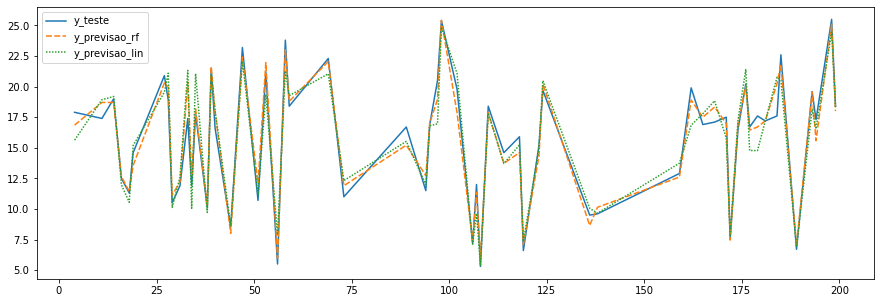

,y_teste,y_previsao_rf,y_previsao_lin
58,23.8,23.017,21.288161
40,16.6,17.912,18.042132
34,11.9,12.665,10.059590
102,19.8,17.877,21.082241
184,17.6,20.244,20.764760
198,25.5,25.101,24.471874
95,16.9,17.023,16.806436
4,17.9,16.853,15.628857
29,10.5,11.134,10.124799
168,17.1,18.334,18.846019


In [18]:
df_resultado = pd.DataFrame()
df_resultado['y_teste'] = y_test
df_resultado['y_previsao_rf'] = test_pred_rf
df_resultado['y_previsao_lin'] = test_pred_lin
fig = plt.figure(figsize = (15, 5))
sns.lineplot(data=df_resultado)
plt.show()
display(df_resultado)

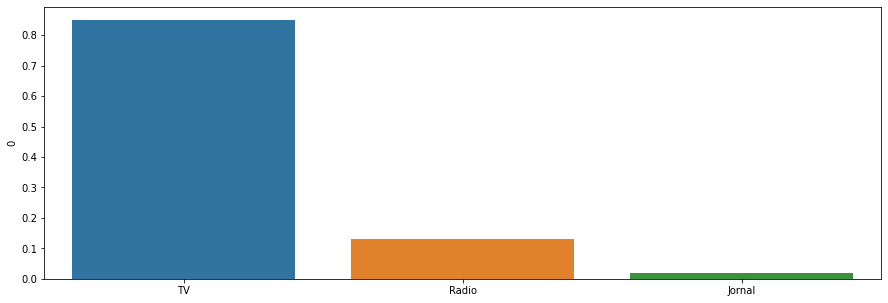

In [27]:
importance_features = pd.DataFrame(randomforest.feature_importances_, x_train.columns)
plt.figure(figsize=(15,5))
sns.barplot(x=importance_features.index, y=importance_features[0])
plt.show()